# RAG: Retrival augumented generation

RAG, or Retrieval-Augmented Generation, is a technique in natural language processing (NLP) that combines retrieval-based methods with generative models to improve the quality and relevance of generated text.

**Retrieval-Augmented Generation (RAG) is the process of optimizing the output of a large language model, so it references an authoritative knowledge base outside of its training data sources before generating a response.**

Known challenges of LLMs include:

- Presenting false information when it does not have the answer.
- Presenting out-of-date or generic information when the user expects a specific, current response.
- Creating a response from non-authoritative sources.
- Creating inaccurate responses due to terminology confusion, wherein different training sources use the same terminology to talk about different things.

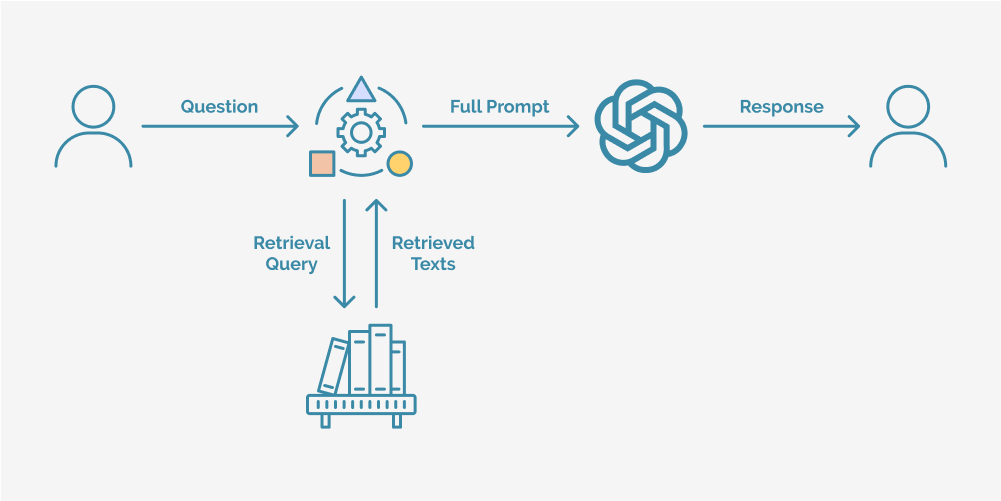

### Deconstructing RAG’s Mechanics
To grasp the essence of RAG LLM, it’s essential to deconstruct its operational mechanics. RAG operates through a series of well-defined steps.


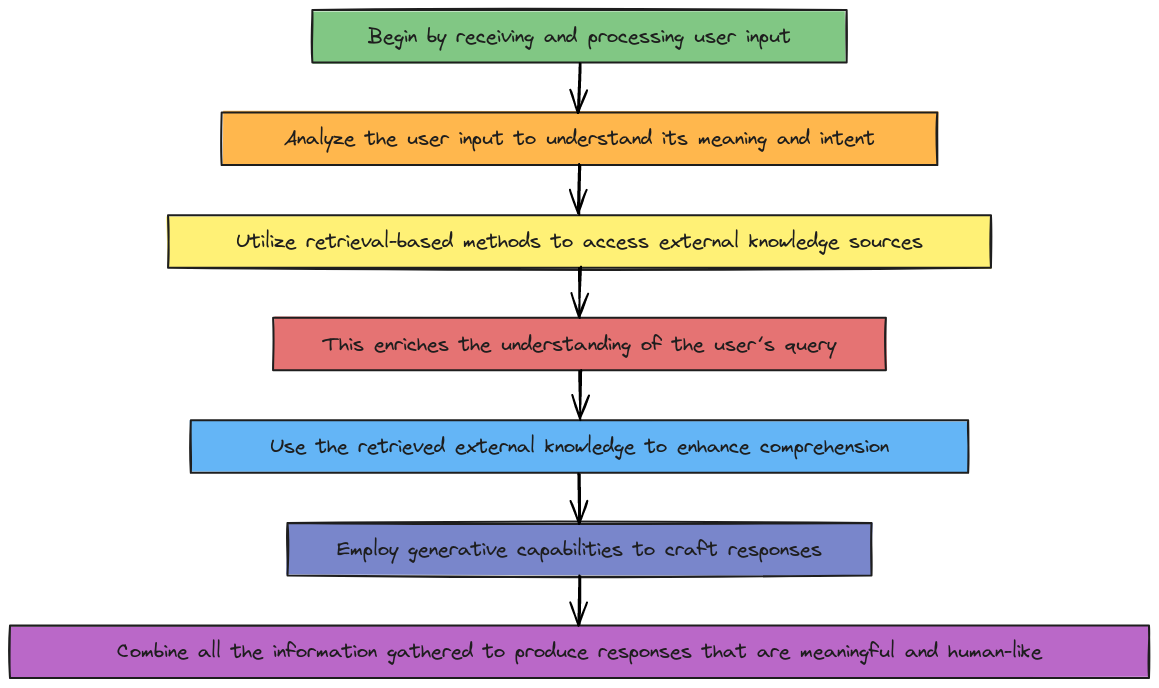

**lets understand how this is actually implimented practically in langchain**

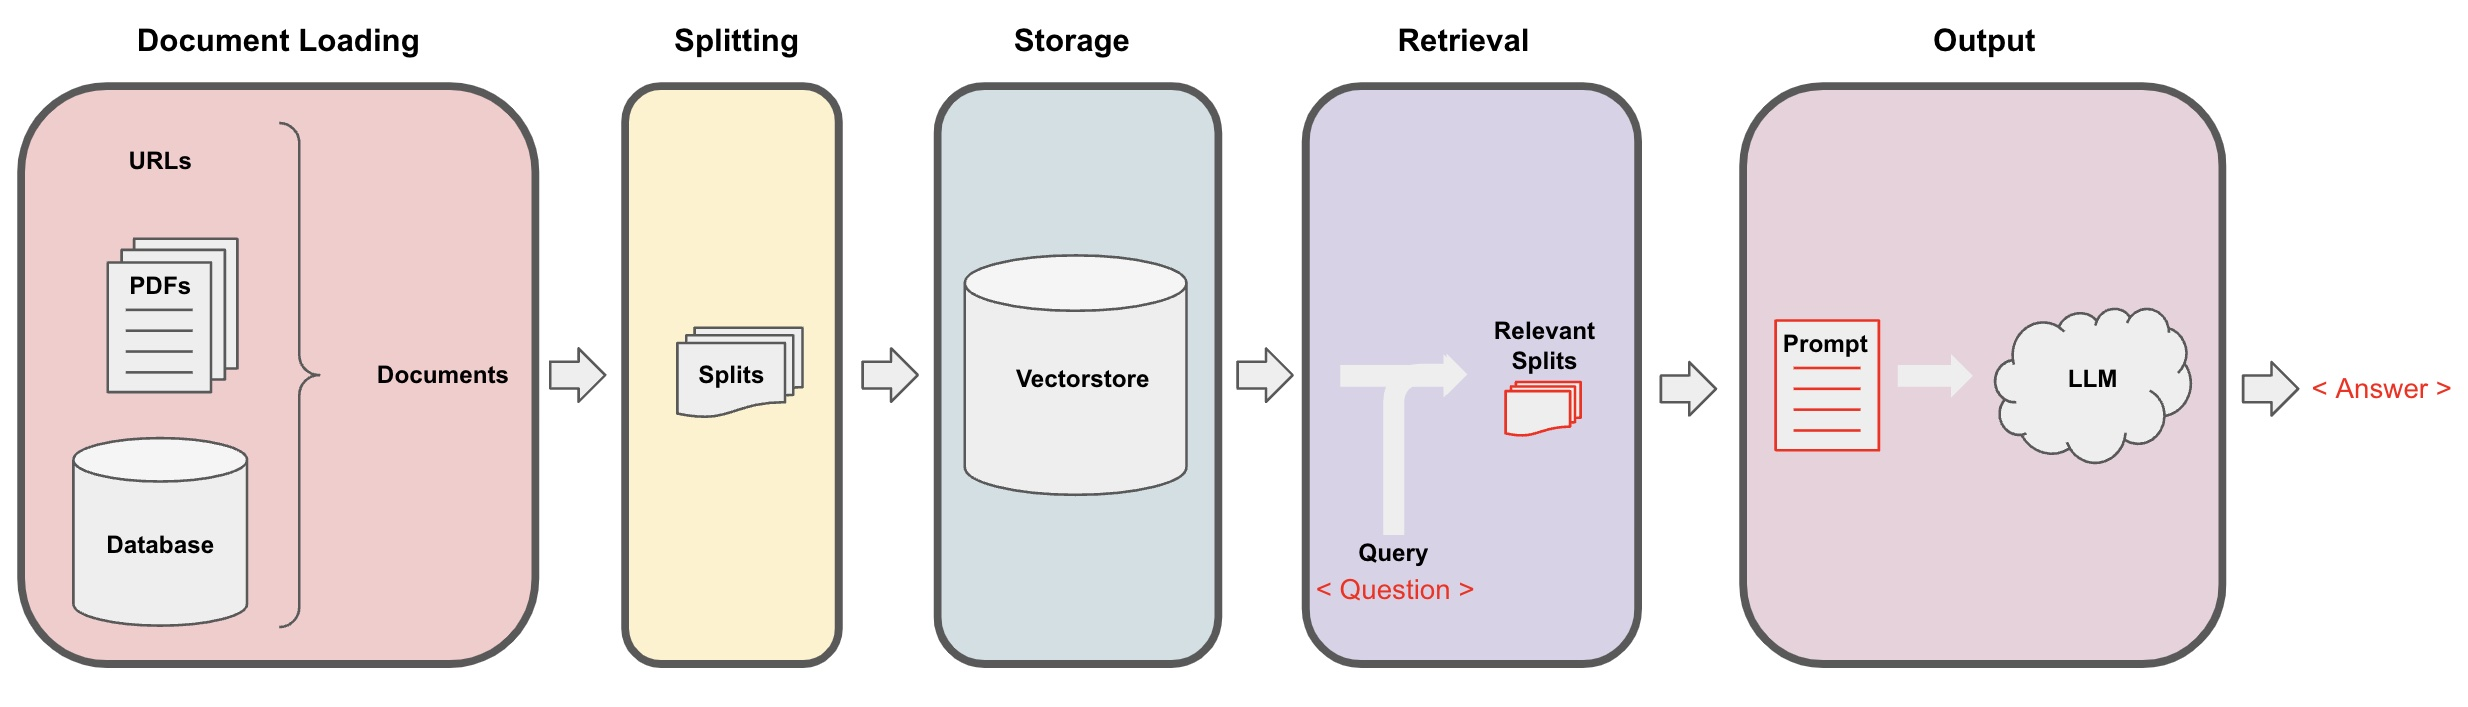

In [ ]:
!pip install --upgrade langchain


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.8/997.8 kB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 384.8/384.8 kB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.4/140.4 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 10.6 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [ ]:
!pip install --upgrade langchain
!pip install langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 34.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 3.1 MB/s eta 0:00:00


In [ ]:
! pip install pypdf

## Document loaders
Document loaders load documents from many different sources.

- **Document loaders convert data from diverse data formats to standardized Document objects.**

The Document object consists of page_content, which has the data as a string, optionally an ID for the Document, and metadata that provides information on the data.
. LangChain provides integrations to load all types of documents (HTML, PDF, code) from all types of locations (private S3 buckets, public websites).

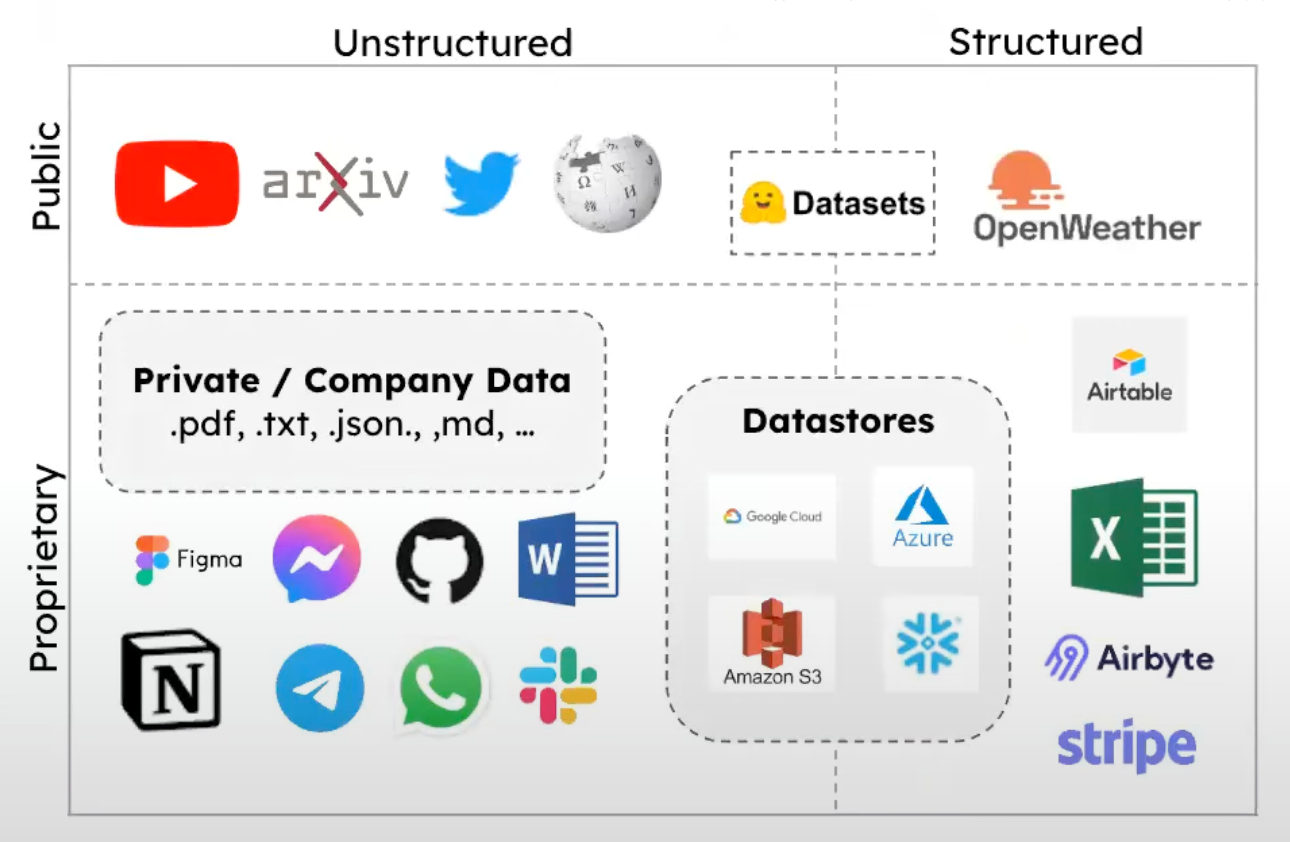

In [ ]:
!gdown 1-F1DO6UNkz3ndjSV4kSzu7zcaQJtf5De

Downloading...
From: https://drive.google.com/uc?id=1-F1DO6UNkz3ndjSV4kSzu7zcaQJtf5De
To: /content/SQL Revision Notes.pdf
100% 2.62M/2.62M [00:00<00:00, 190MB/s]


In [ ]:
from langchain.document_loaders import PyPDFLoader
loader = PyPDFLoader("SQL Revision Notes.pdf")
pages = loader.load()

In [ ]:
len(pages)

40

In [ ]:
page = pages[0]

In [ ]:
print(page)

page_content='SQL
Revision
notes
' metadata={'source': 'SQL Revision Notes.pdf', 'page': 0}


In [ ]:
page.metadata

{'source': 'SQL Revision Notes.pdf', 'page': 0}

In [ ]:
page = pages[1]

In [ ]:
print(page.page_content[0:50])

Relational
Database
●
It
is
a
collection
of
interr


### Different document loaders

https://python.langchain.com/v0.1/docs/integrations/document_loaders/

Head to the above link for documentation on built-in document loader integrations with 3rd-party tools.
currently it has integrations available with almost any and all file formats you would need and many 3rd party sources.


There are more than two hundred document loaders in LangChain. They can be categorized as follows

- Based on file type: These document loaders parse and load the documents based on the file type. Example file types include CSV, PDF, HTML, Markdown, etc.
- Based on data source: They get the data from different data sources and load it into Document objects. Examples of data sources include YouTube, Wikipedia, and GitHub.

Data sources can be further classified as public and private. Public data sources like YouTube or Wikipedia don’t need access tokens, while private data sources like AWS or Azure do.

Lets try youtube video transcripts

In [ ]:
! pip install youtube_transcript_api
! pip install pytube

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 3.6 MB/s eta 0:00:00


In [ ]:
from langchain_community.document_loaders import YoutubeLoader

video_url = 'https://www.youtube.com/watch?v=LKCVKw9CzFo'
loader = YoutubeLoader(video_id='LKCVKw9CzFo', add_video_info=True)
data = loader.load()
len(data)

1

In [ ]:
data[0].page_content

"statistically 96% of the humans watching this video are not using Linux and that's just like really sad because it's a superior free open source operating system but only has a 4% share of the PC market luckily though 96% of the non-human Bots watching this video are using Linux because it is the dominant OS on the server if you're a programmer or developer you need to know Linux that's where your code will eventually run and fail and if you can't SSH into a Linux terminal and fix it you are screwed in today's video you'll learn everything you need to know about Linux by looking at 101 essential Concepts over the next 10 minutes if you survive until the end you should magically grow neck beard and be able to technobabble like an arch user before one can understand Linux though one must recognize what came before it Unix an operating system developed at AT&T Bell labs in the 70s its development led to a standardization called posix or portable operating system interface to ensure that 

In [ ]:

from langchain.document_loaders import WebBaseLoader

loader = WebBaseLoader("https://blogs.nvidia.com/blog/what-is-retrieval-augmented-generation/")
docs = loader.load()
print(docs[0].page_content[:500])






















What Is Retrieval-Augmented Generation aka RAG | NVIDIA Blogs



































































 



Skip to content






													Artificial Intelligence Computing Leadership from NVIDIA												











Search for:





 




Toggle Search




 





 






Search for:




 





 


 
 

 
 

 
 

 
 


 
 

 
 

 
 

 
 


 
 







Privacy Policy


Manage My Privacy


Legal


Accessibility


Product Security


Contact



			


## Document splitting

A key part of retrieval is fetching only the relevant parts of documents. This involves several transformation steps to prepare the documents for retrieval. One of the primary ones here is splitting (or chunking) a large document into smaller chunks. LangChain provides several transformation algorithms for doing this, as well as logic optimized for specific document types (code, markdown, etc).

 This is usually done before feeding the document into a retrieval-augmented generation system like LangChain. Each chunk typically represents a coherent piece of information, such as a paragraph or a few sentences.




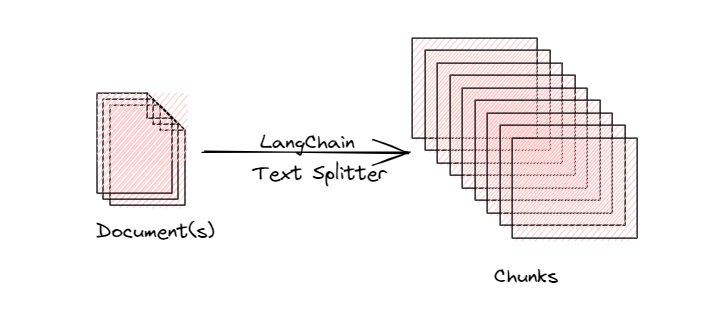

### Why is Document Splitting Required?
- Memory Constraints:

Generative models like those used in RAG systems often have a maximum token limit they can process at once. Large documents might exceed this limit, making it impossible to handle them as a single input.
- Improved Retrieval Efficiency:

Smaller chunks of text allow the retrieval system to index and search more efficiently. It can pinpoint the most relevant sections of a document rather than dealing with the entire document, which improves the accuracy of the retrieval process.
- Enhanced Relevance:

By splitting documents, each chunk can be treated as a separate entity, ensuring that the retrieval component returns the most relevant pieces of information related to the query. This leads to more precise and contextually appropriate responses from the generative model.
- Scalability:

Managing smaller chunks of text is computationally less intensive and more scalable. It allows the system to handle a larger volume of documents and queries efficiently.

## Character TextSplitter

In [ ]:
from langchain.text_splitter import CharacterTextSplitter
char_text_splitter = CharacterTextSplitter(
    separator = " "
    #add parameters like chunk size and overlap
)

In [ ]:
text1 = "abcdefghijklmnopqrstuvwxyz"
print(char_text_splitter.split_text(text1))

['abcdefghijklmnopqrstuvwxyz']


In [ ]:
text2 = "abcdefghijklmnopqrstuvwxyz abcdefg"
print(char_text_splitter.split_text(text2))

['abcdefghijklmnopqrstuvwxyz abcdefg']


In [ ]:
text2 = "abcdefghijk lmnopqrs tuvwxyz abcdefg"
print(char_text_splitter.split_text(text2))

['abcdefghijk lmnopqrs tuvwxyz abcdefg']


some common seperators which would be logical to break upon and are commonly used are:



```
"\n\n" : Paragraph
"\n"   : New Line
" "    : Space
```
normaly breaking on paragraphs or new lines make more sense


## RecursiveCharacterTextSplitter
The RecursiveCharacterTextSplitter is recommended for generic text splitting. It splits the text based on a hierarchy of separators, starting with double newlines (\n\n), then single newlines (\n), spaces ( ), and finally, individual characters. This approach aims to preserve the structure and coherence of the text by prioritizing splitting at natural boundaries like paragraphs and sentences.

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

- lets try a simple example then we'll look at the recursive part. first lets understand the chunk size and overlap

In [ ]:

r_splitter = RecursiveCharacterTextSplitter(
    chunk_size=20,
    chunk_overlap=4,
)

In [ ]:
text2 = "abcdefghijklmnopqrstuvwxyzabcdefg"
print(r_splitter.split_text(text2))

['abcdefghijklmnopqrst', 'qrstuvwxyzabcdefg']


### Chunk overlap

The chunk_size corresponds to the size of each chunk, which can be measured in characters or tokens (we'll discuss both approaches). The chunk_overlap is a portion of text that is shared between consecutive chunks, allowing for context to be maintained across chunk boundaries.



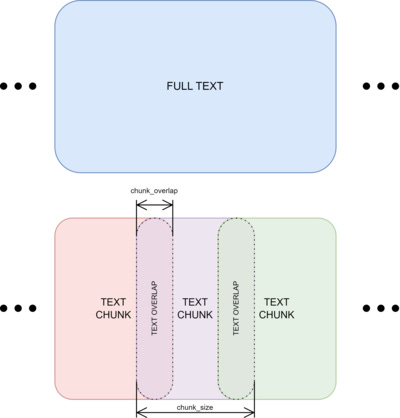

- now lets look at a better example for understanding the actual recirsive part of it.

In [ ]:
some_text = """When writing documents, writers will use document structure to group content. This can convey to the reader, which idea's are related. For example, closely related ideas are in sentances. Similar ideas are in paragraphs. Paragraphs form a document. Paragraphs are often delimited with a carriage return or two carriage returns. Carriage returns are the "backslash n" you see embedded in this string. Sentences have a period at the end, but also, have a space and words are separated by space."""

len(some_text)

492

In [ ]:
r_splitter.split_text(some_text)

['When writing',
 'documents, writers',
 'will use document',
 'structure to group',
 'content. This can',
 'can convey to the',
 'the reader, which',
 "idea's are related.",
 'For example,',
 'closely related',
 'ideas are in',
 'in sentances.',
 'Similar ideas are',
 'are in paragraphs.',
 'Paragraphs form a',
 'a document.',
 'Paragraphs are',
 'are often delimited',
 'with a carriage',
 'return or two',
 'two carriage',
 'returns. Carriage',
 'returns are the',
 'the "backslash n"',
 'n" you see embedded',
 'in this string.',
 'Sentences have a',
 'a period at the',
 'the end, but also,',
 'have a space and',
 'and words are',
 'are separated by',
 'by space.']

you can play around with different text splitters here:

https://chunkviz.up.railway.app/#explanation


In [ ]:
some_text = """What I Worked On

February 2021

Before college the two main things I worked on, outside of school, were writing and programming. I didn't write essays. I wrote what beginning writers were supposed to write then, and probably still are: short stories. My stories were awful. They had hardly any plot, just characters with strong feelings, which I imagined made them deep.

The first programs I tried writing were on the IBM 1401 that our school district used for what was then called "data processing." This was in 9th grade, so I was 13 or 14. The school district's 1401 happened to be in the basement of our junior high school, and my friend Rich Draves and I got permission to use it. It was like a mini Bond villain's lair down there, with all these alien-looking machines — CPU, disk drives, printer, card reader — sitting up on a raised floor under bright fluorescent lights.
"""

r_splitter = RecursiveCharacterTextSplitter(
     separators=['\n\n', '\n', '.' ],
     chunk_size = 200,
    chunk_overlap  = 0,
)


chunks = r_splitter.split_text(some_text)
print("Chunks: ", chunks)
print("Length of chunks: ", len(chunks))

Chunks:  ['What I Worked On\n\nFebruary 2021', "Before college the two main things I worked on, outside of school, were writing and programming. I didn't write essays", '. I wrote what beginning writers were supposed to write then, and probably still are: short stories. My stories were awful', '. They had hardly any plot, just characters with strong feelings, which I imagined made them deep.', 'The first programs I tried writing were on the IBM 1401 that our school district used for what was then called "data processing." This was in 9th grade, so I was 13 or 14', ". The school district's 1401 happened to be in the basement of our junior high school, and my friend Rich Draves and I got permission to use it", ". It was like a mini Bond villain's lair down there, with all these alien-looking machines — CPU, disk drives, printer, card reader — sitting up on a raised floor under bright fluorescent lights."]
Length of chunks:  7


In [ ]:
for chunk in chunks:
  print(chunk)
  print(len(chunk))
  print("-------------------------------------------")


What I Worked On

February 2021
31
-------------------------------------------
Before college the two main things I worked on, outside of school, were writing and programming. I didn't write essays
118
-------------------------------------------
. I wrote what beginning writers were supposed to write then, and probably still are: short stories. My stories were awful
122
-------------------------------------------
. They had hardly any plot, just characters with strong feelings, which I imagined made them deep.
98
-------------------------------------------
The first programs I tried writing were on the IBM 1401 that our school district used for what was then called "data processing." This was in 9th grade, so I was 13 or 14
170
-------------------------------------------
. The school district's 1401 happened to be in the basement of our junior high school, and my friend Rich Draves and I got permission to use it
143
-------------------------------------------
. It was like a mini Bond 

the RecursiveCharacterTextSplitter attempts to initiate splits using a predefined set of characters. Its first attempt involves the \n\n character, which serves as a means to split by paragraphs. Let's now identify all occurrences of this character within our text.



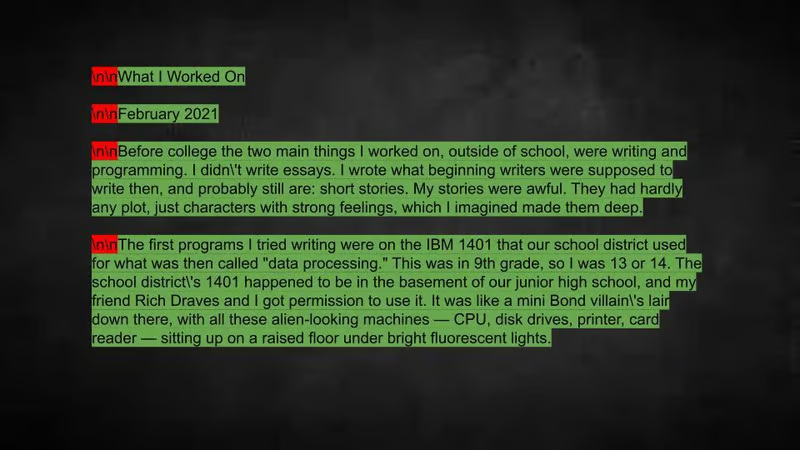

The first two splits satisfy this condition, thus earning them the label of good splits. Since both segments consist of fewer than 100 characters, we can combine them to create our initial chunk.



- now when we look at the next part it exceeds the length specified 200, so we look at what other splitters are available for us
  - ideally we try to find the next one which sould be new line, but we dont have that so we move to the next one which is a full stop
  - this is how we get our next chunks.
  - now when we get a new paragraph we use that as seprator.

- so this is how we recursively create chunks

### Other splitters

there are other splittrers specific to some tasks whcih you can have a look at here: https://python.langchain.com/v0.1/docs/modules/data_connection/document_transformers/

## Embeddings

Embeddings play a crucial role in Retrieval-Augmented Generation (RAG) by providing a dense, low-dimensional representation of text that captures semantic information. These embeddings facilitate efficient and accurate retrieval of relevant information, which is then used to enhance the generative model's outputs.

### Role of Embeddings in RAG

- **Semantic Search:** Traditional keyword-based retrieval methods rely on exact matches and often miss semantically similar content. Embeddings enable  the retrieval system to identify documents or text chunks that are contextually relevant to the query. This is crucial for providing the generative model with high-quality, relevant information.

- **Dense Retrieval:** In RAG, embeddings are used to perform dense retrieval, which involves searching for the most relevant documents based on the similarity of their embeddings rather than their surface text. This improves the retrieval accuracy.

- **Indexing and Search Efficiency:** Embeddings make it possible to efficiently index and search through large datasets. Techniques like approximate nearest neighbor (ANN) search can quickly find the most similar embeddings in a large corpus.

- **Handling Large Corpora:** Embeddings enable RAG systems to handle and retrieve relevant information from large corpora efficiently, making them scalable to real-world applications.

- **Reduced Hallucination:** Providing the generative model with relevant retrieved documents helps reduce the instances where the model "hallucinates" or generates incorrect information.

In [ ]:
! pip install openai
! pip install tiktoken

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 361.3/361.3 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.4 MB/s eta 0:00:00


In [ ]:
!pip install langchain-community langchain-core
!pip install tiktoken


In [ ]:
!pip install openai

In [ ]:
import config
import openai
#from langchain.embeddings.openai import OpenAIEmbeddings
from langchain_community.embeddings import OpenAIEmbeddings
import tiktoken
embedding = OpenAIEmbeddings(api_key=config.API_KEY)

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:141: LangChainDeprecationWarning: The class `OpenAIEmbeddings` was deprecated in LangChain 0.0.9 and will be removed in 0.3.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import OpenAIEmbeddings`.
  warn_deprecated(


In [ ]:
sentence1 = "i like dogs"
sentence2 = "i like canines"
sentence3 = "the weather is ugly outside"

In [ ]:
embedding1 = embedding.embed_query(sentence1)
embedding2 = embedding.embed_query(sentence2)
embedding3 = embedding.embed_query(sentence3)

In [ ]:
import numpy as np

In [ ]:
np.dot(embedding1, embedding2)

0.9630350414845885

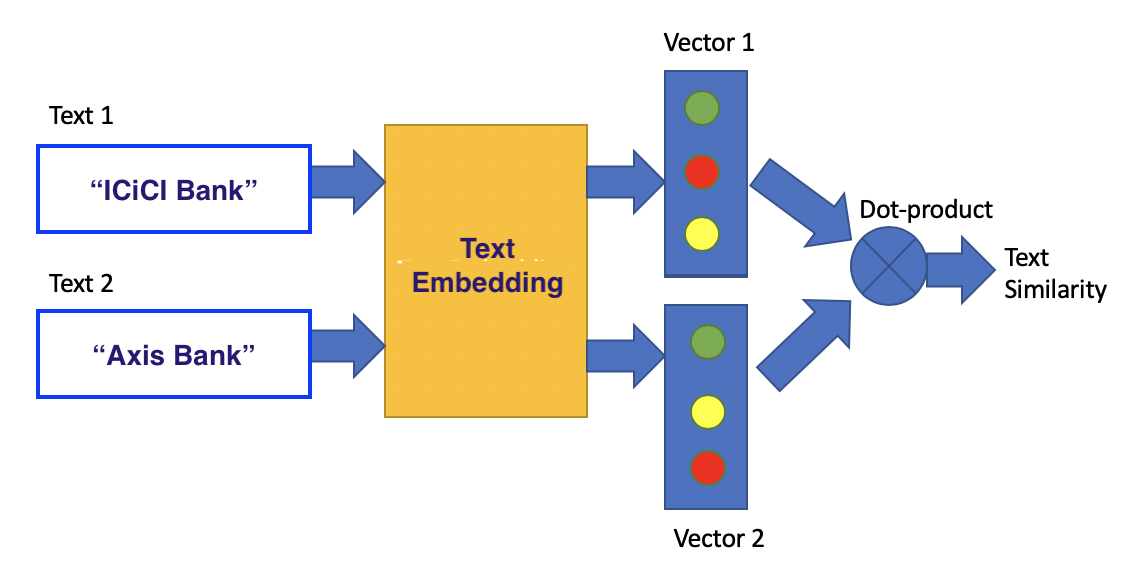

- Each embedding (vector) points in a certain direction based on the features it represents.
- The angle between the two vectors indicates how similar their directions are. Smaller angles mean they point in more similar directions, indicating higher similarity.

- When the vectors are pointing in the same direction, the cosine of the angle is 1, making the dot product large.
- When the vectors are perpendicular, the cosine of the angle is 0, making the dot product zero.
- When the vectors are pointing in exactly opposite directions, the cosine of the angle is -1, making the dot product negative.
- Therefore, a higher dot product value means the vectors are more similar (pointing in similar directions).


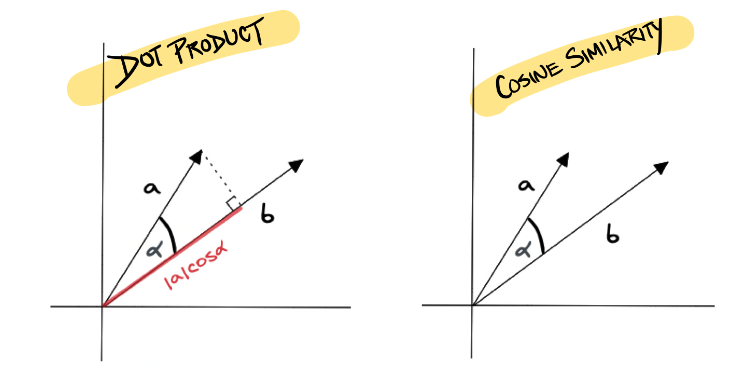

## Vectorstores

Now that we have embedding vectors we need to store it somewhere so that we can retrieve it when we want right, and we also want it to be really fast.

A vector store is a specialized database designed to store, index, and retrieve vector embeddings efficiently. In the context of RAG (Retrieval-Augmented Generation), these embeddings represent the semantic meaning of text data, such as sentences, paragraphs, or entire documents.



### How Vector Stores Work
Imagine you have a library with millions of books. Finding the right book using traditional methods (like searching through an index of keywords) can be time-consuming and might not always yield the best results, especially if the keywords don't match exactly.

- **Embeddings:** Instead of cataloging books by keywords, we transform each book into a unique code (embedding) that captures its meaning. Think of this as summarizing the content of each book into a compact, dense representation.

- **Vector Store:** We store all these codes in a special database (vector store). This database is designed to handle these dense representations efficiently.

- **Querying:** When you want to find relevant books, you describe what you're looking for (query). This query is also transformed into an embedding.

- **Similarity Search:** The vector store then quickly finds the books whose embeddings are most similar to the query's embedding. This process is like finding books that are close to each other in a multidimensional space based on their content.

In [ ]:
!gdown 1yVbhJWh4L1unDbDT4APOusTXlwic7aE9
!gdown 1-F1DO6UNkz3ndjSV4kSzu7zcaQJtf5De

Downloading...
From: https://drive.google.com/uc?id=1yVbhJWh4L1unDbDT4APOusTXlwic7aE9
To: /content/PA - Consolidated lecture notes.pdf
100% 4.28M/4.28M [00:00<00:00, 55.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-F1DO6UNkz3ndjSV4kSzu7zcaQJtf5De
To: /content/SQL Revision Notes.pdf
100% 2.62M/2.62M [00:00<00:00, 152MB/s]


In [ ]:
!pip install pypdf

In [ ]:
from langchain.document_loaders import PyPDFLoader

# Load PDF
loaders = [
    # Duplicate documents on purpose - messy data
    PyPDFLoader("PA - Consolidated lecture notes.pdf"),
    PyPDFLoader("SQL Revision Notes.pdf")
]
docs = []
for loader in loaders:
    docs.extend(loader.load())

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 1500,
    chunk_overlap = 150,
    separators=["\n\n","\n","."," "]
)

In [ ]:
splits = text_splitter.split_documents(docs)

In [ ]:
len(splits)

83

so from the two documnets we get 83 splits or chunks
- now lets create a FAISS vectorestore for it

## FAISS

FAISS (Facebook AI Similarity Search) is a library developed by Facebook AI that is designed for efficient similarity search and clustering of dense vectors. It is particularly useful for tasks such as nearest neighbor search, which is a core operation in many machine learning applications, including retrieval-augmented generation (RAG).

- Imagine a massive library. Each book or in our case just the two documents is a vector representing information or a piece of text. Finding a specific book or text chunks/split (vector) based on its content (similarity) is like finding similar items in a vast dataset.

- Faiss is like a super-efficient librarian. It organizes books (vectors) into categories (clusters) to speed up the search. When you look for a book (query vector), Faiss doesn't check every single book; it narrows down the search to the relevant categories, saving lots of time.

- if you remember we learned this in the PA module as well

### **How FAISS Works**



**Index Building:**

  - An index is selected based on the data. The kind and method of how that is created is something that we'll see later

**Searching:**

  - When a query vector is presented, FAISS uses the index to quickly find the nearest neighbors.

**Distance Computation:**

- FAISS efficiently computes the distances between the query vector and the candidate vectors from the index. It uses optimized implementations to handle large-scale data.

**Retrieving Results:**

  - The vectors with the smallest distances to the query vector are returned as the nearest neighbors, typically along with their similarity scores.

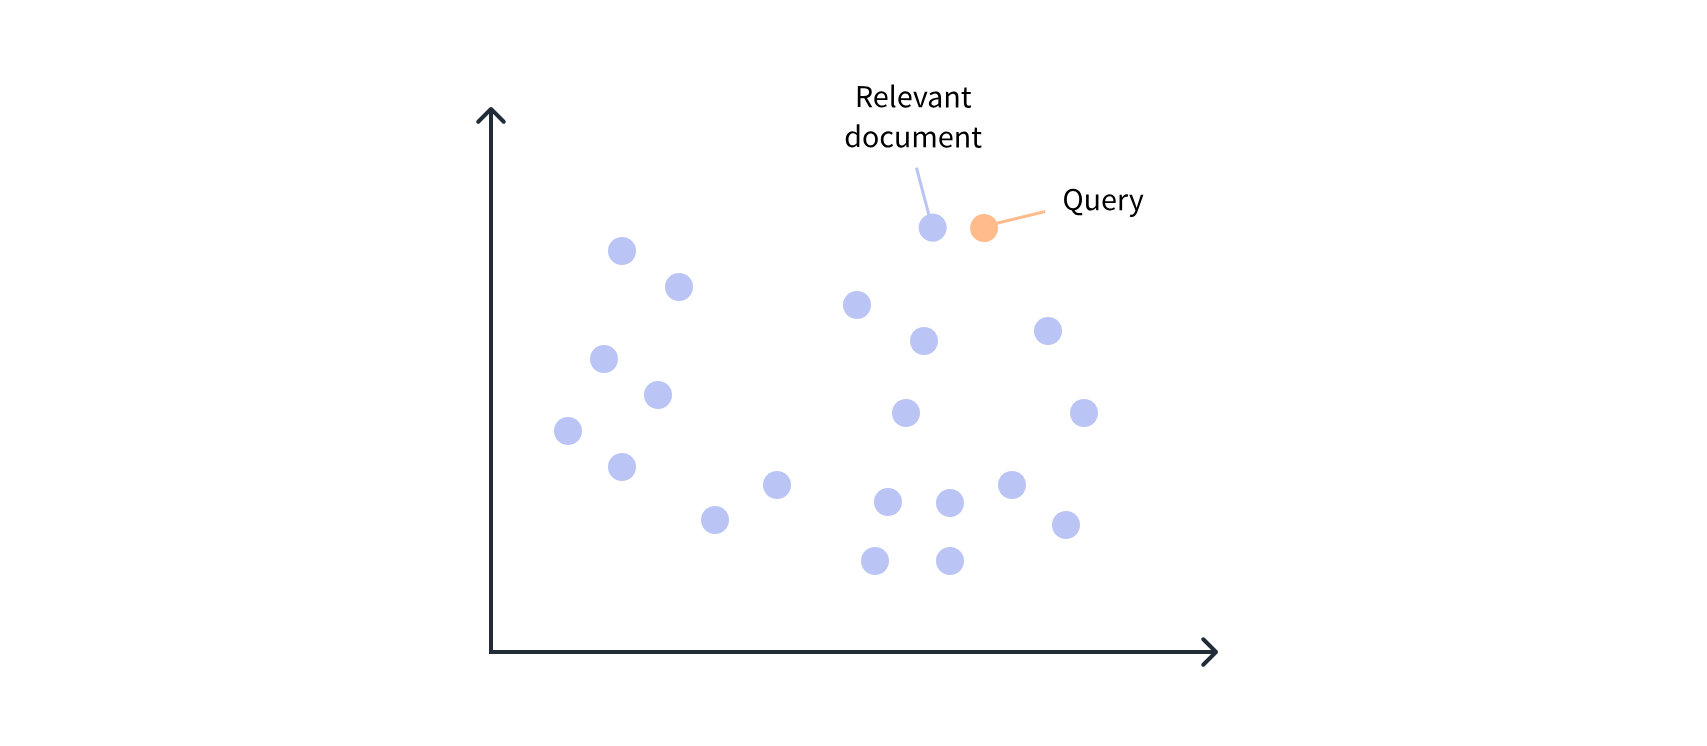

In [ ]:
! pip install faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 37.8 MB/s eta 0:00:00


In [ ]:

from langchain_community.vectorstores import FAISS

db = FAISS.from_documents(splits, embedding)
print(db.index.ntotal)

83


- voila, brawo, hee-haw, thats it. we are done adding the documnets to the faiss vector store
- this is the ingestion stage
- now lets try the querying phase

In [ ]:
query = "What is north star metric"
docs = db.similarity_search(query)
print(docs[0].page_content)


Focus
metric
/
North
Star
metric
-
This
is
the
single
most
important
measure
of
success
that
matters
a
lot
to
a
company .
A
North
Star
Metric
(NSM)
should
be:
●
A
direct
reflection
of
the
company’ s
mission
●
An
indicator
of
how
a
company
brings
value
to
its
customers.
●
The
only
one
of
its
kind.
(Avoid
having
multiple
NSMs
as
this
tends
to
create
complexity
and
confusion)
●
The
answer
to
the
following
question:
What
is
the
one
metric
that
best
represents
the
desired
outcome
of
your
company?
Which
metric,
if
it
were
to
increase
today ,
would
most
accelerate
my
business’
flywheel?
Level
1
metric
/
Primary
metric
-
●
Primary
metrics
depict
the
desired
outcome
of
a
particular
product,
team,
or
initiative.
This
is
unlike
the
NSM,
which
represents
the
desired
outcome
of
the
company
as
a
whole.


In [ ]:
docs_and_scores = db.similarity_search_with_score(query)

docs_and_scores[0]


(Document(metadata={'source': 'PA - Consolidated lecture notes.pdf', 'page': 16}, page_content='Focus\nmetric\n/\nNorth\nStar\nmetric\n-\nThis\nis\nthe\nsingle\nmost\nimportant\nmeasure\nof\nsuccess\nthat\nmatters\na\nlot\nto\na\ncompany .\nA\nNorth\nStar\nMetric\n(NSM)\nshould\nbe:\n●\nA\ndirect\nreflection\nof\nthe\ncompany’ s\nmission\n●\nAn\nindicator\nof\nhow\na\ncompany\nbrings\nvalue\nto\nits\ncustomers.\n●\nThe\nonly\none\nof\nits\nkind.\n(Avoid\nhaving\nmultiple\nNSMs\nas\nthis\ntends\nto\ncreate\ncomplexity\nand\nconfusion)\n●\nThe\nanswer\nto\nthe\nfollowing\nquestion:\nWhat\nis\nthe\none\nmetric\nthat\nbest\nrepresents\nthe\ndesired\noutcome\nof\nyour\ncompany?\nWhich\nmetric,\nif\nit\nwere\nto\nincrease\ntoday ,\nwould\nmost\naccelerate\nmy\nbusiness’\nflywheel?\nLevel\n1\nmetric\n/\nPrimary\nmetric\n-\n●\nPrimary\nmetrics\ndepict\nthe\ndesired\noutcome\nof\na\nparticular\nproduct,\nteam,\nor\ninitiative.\nThis\nis\nunlike\nthe\nNSM,\nwhich\nrepresents\nthe\ndesired\noutco

In [ ]:
query = "What is primary key"
docs_and_scores = db.similarity_search_with_score(query)

docs_and_scores[0]


(Document(metadata={'source': 'SQL Revision Notes.pdf', 'page': 1}, page_content='Relational\nDatabase\n●\nIt\nis\na\ncollection\nof\ninterrelated\ntables.\nThe\ndata\nwithin\nthese\ntables\nhave\nrelationships\nwith\none\nanother.\nExample:\nMicrosoft\nSQL\nServer,\nMySQL,\netc.\n●\nA\nrelational\ndatabase\nis\nstructured.\nNon-relational\nDatabase\n●\nIt\nis\na\nkind\nof\ndatabase\nthat\ndoesn’t\nuse\ntables,\nfields,\nand\ncolumns\nof\nstructured\ndata.\nExamples:\nMongoDB,\nApache\nCassandra,\netc.\n●\nA\nnon-relational\ndatabase\nis\nsemi-structured\nor\nunstructured.\nManagement\nsystem\n●\nA\nset\nof\noperations\nthat\nhelp\nus\nto\nmanage\nthe\ndatabase.\n●\nSome\nof\nthese\noperations\nare\ncalled\nCRUD\noperations.\n○\nC\n-\ncreate\n○\nR\n-\nread\n○\nU\n-\nupdate\n○\nD\n-\ndelete\nTypes\nof\nrelationships\nin\nRDBMS\nThere\nare\nthree\ntypes\nof\nrelationships\nthat\ncan\nbe\npresent\nbetween\ntables:\n●\nOne-to-one\nrelationship\noccurs\nwhen\neach\nrow\nin\nTable\n1\nhas\no

- notice the score here is not too high
  - that because The returned distance score is EUCLIDEAN_DISTANCE . Therefore, a lower score is better.
  - remember this EUCLIDEAN_DISTANCE from the ml modules

In [ ]:
print(docs_and_scores[0][0].page_content)

Relational
Database
●
It
is
a
collection
of
interrelated
tables.
The
data
within
these
tables
have
relationships
with
one
another.
Example:
Microsoft
SQL
Server,
MySQL,
etc.
●
A
relational
database
is
structured.
Non-relational
Database
●
It
is
a
kind
of
database
that
doesn’t
use
tables,
fields,
and
columns
of
structured
data.
Examples:
MongoDB,
Apache
Cassandra,
etc.
●
A
non-relational
database
is
semi-structured
or
unstructured.
Management
system
●
A
set
of
operations
that
help
us
to
manage
the
database.
●
Some
of
these
operations
are
called
CRUD
operations.
○
C
-
create
○
R
-
read
○
U
-
update
○
D
-
delete
Types
of
relationships
in
RDBMS
There
are
three
types
of
relationships
that
can
be
present
between
tables:
●
One-to-one
relationship
occurs
when
each
row
in
Table
1
has
only
one
related
row
in
Table
2.
●
One-to-many
occurs
when
one
record
in
Table
1
is
related
to
one
or
more
records
in
Table
2.
●
Many-to-many
occurs
when
multiple
records
in
one
table
are
related
to
multiple
record

In [ ]:
query = "list out some engagement metrics"
docs_and_scores = db.similarity_search_with_score(query,k=3)

docs_and_scores[0]


(Document(metadata={'source': 'PA - Consolidated lecture notes.pdf', 'page': 11}, page_content="1.\n%\nof\nusers\nreturning\nto\nview\nsaved\ncontent\norganically\n(on\ntheir\nown)\n-\nUser\nknows\nwhere\nto\nﬁnd\nSaved\nitems\nand\nknows\nhow\nto\nwork\nwith\nit.\n2.\n%\nof\nusers\nreturning\ninorganically\n(i.e.,\nreminded\nby\n3.\nFacebook\nto\nview\nsaved\ncontent).\n2.\nAcquisition:\na.\n#\nof\nnew\nclients\nwho\nwant\nto\nadvertise\nwith\nFacebook.\nb.\nIncreased\nspending\nof\nexisting\nclients\nwith\nFacebook\nsince\nthe\nlaunch\nof\nthe\nsave\nfeature.\n3.\nActivation:\na.\nAdoption:\ni.\n%\nof\ntotal\nposts\nsaved\n(#\nSaved\nPosts\n/\n#\nTotal\nPosts)-Indicates\nthe\nadoption\nrate\nof\nthe\nsave\nfeature\n-\n#\npeople\nusing\nthe\nsave\nfeature\nactively.\n4.\nEngagement:\na.\nAverage\nnumber\nof\nlikes,\ncomments,\nshares\nper\nsaved\npost\non\na\ndaily,\nweekly,\nand\nmonthly\nbasis-\nindicates\nthe\nuser\nengagement\non\na\nbroader\nlevel.\nCompare\nthis\nwith\na\ngenera

In [ ]:
for results in docs_and_scores:
  print(results)
  print("------------------------------------------")

(Document(metadata={'source': 'PA - Consolidated lecture notes.pdf', 'page': 11}, page_content="1.\n%\nof\nusers\nreturning\nto\nview\nsaved\ncontent\norganically\n(on\ntheir\nown)\n-\nUser\nknows\nwhere\nto\nﬁnd\nSaved\nitems\nand\nknows\nhow\nto\nwork\nwith\nit.\n2.\n%\nof\nusers\nreturning\ninorganically\n(i.e.,\nreminded\nby\n3.\nFacebook\nto\nview\nsaved\ncontent).\n2.\nAcquisition:\na.\n#\nof\nnew\nclients\nwho\nwant\nto\nadvertise\nwith\nFacebook.\nb.\nIncreased\nspending\nof\nexisting\nclients\nwith\nFacebook\nsince\nthe\nlaunch\nof\nthe\nsave\nfeature.\n3.\nActivation:\na.\nAdoption:\ni.\n%\nof\ntotal\nposts\nsaved\n(#\nSaved\nPosts\n/\n#\nTotal\nPosts)-Indicates\nthe\nadoption\nrate\nof\nthe\nsave\nfeature\n-\n#\npeople\nusing\nthe\nsave\nfeature\nactively.\n4.\nEngagement:\na.\nAverage\nnumber\nof\nlikes,\ncomments,\nshares\nper\nsaved\npost\non\na\ndaily,\nweekly,\nand\nmonthly\nbasis-\nindicates\nthe\nuser\nengagement\non\na\nbroader\nlevel.\nCompare\nthis\nwith\na\ngenera

### Saving the created DB

now that we have our db we can just save that and wont need the documents everytime

In [ ]:
db.save_local("faiss_db")


In [ ]:

new_db = FAISS.load_local("faiss_db", embedding, allow_dangerous_deserialization=True)

docs = new_db.similarity_search(query)

https://github.com/aws-samples/serverless-pdf-chat/issues/45

## Question answering

This is the final step of the puzzel taking the information from the database, the question from the user and LLM magic to generate a beautiful answer using that information as the context

In [ ]:
from langchain.chains import RetrievalQA
from langchain.chat_models import ChatOpenAI


llm = ChatOpenAI(api_key=config.API_KEY, model_name='gpt-3.5-turbo', temperature=0)

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:141: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 0.3.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import ChatOpenAI`.
  warn_deprecated(


In [ ]:
qa_chain = RetrievalQA.from_chain_type(
    llm,
    retriever=new_db.as_retriever()
)

In [ ]:
result = qa_chain({"query": query})
print(result["result"])

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:141: LangChainDeprecationWarning: The method `Chain.__call__` was deprecated in langchain 0.1.0 and will be removed in 0.3.0. Use invoke instead.
  warn_deprecated(


Some engagement metrics that can be considered are:

1. Average number of likes, comments, shares per saved post on a daily, weekly, and monthly basis.
2. Percentage of Saved items that the user opens from the Saved page.
3. Amount of time spent on a page after opening it from the Saved page.
4. The average amount of time it took a user from saving an item to opening it again.
5. Compare the engagement levels of posts with the save feature to general posts without the save feature to see if engagement is higher with the new feature.


- we can improve this with prompt template

In [ ]:
from langchain.prompts import PromptTemplate

# Build prompt
template = """Use the following pieces of context to answer the question at the end. If you don't know the answer and dont find it in the given context, just say that you don't know , don't try to make up an answer.
{context}
Question: {question}
Helpful Answer:"""
QA_CHAIN_PROMPT = PromptTemplate.from_template(template)


- context is where the retrieved docs will go
- question is where the relevant query would go

In [ ]:
# Run chain
qa_chain = RetrievalQA.from_chain_type(
    llm,
    retriever=new_db.as_retriever(),
    return_source_documents=True,
    chain_type_kwargs={"prompt": QA_CHAIN_PROMPT}
)

In [ ]:
result = qa_chain({"query": query})
print(result['result'])

Some engagement metrics could include:
- Average number of likes, comments, shares per saved post on a daily, weekly, and monthly basis
- % of Saved items that the user opens from the Saved page
- Amount of time spent on a page after opening it from the Saved page
- The average amount of time it took a user from saving an item to opening it again


In [ ]:
result["source_documents"][0]

Document(metadata={'source': 'PA - Consolidated lecture notes.pdf', 'page': 11}, page_content="1.\n%\nof\nusers\nreturning\nto\nview\nsaved\ncontent\norganically\n(on\ntheir\nown)\n-\nUser\nknows\nwhere\nto\nﬁnd\nSaved\nitems\nand\nknows\nhow\nto\nwork\nwith\nit.\n2.\n%\nof\nusers\nreturning\ninorganically\n(i.e.,\nreminded\nby\n3.\nFacebook\nto\nview\nsaved\ncontent).\n2.\nAcquisition:\na.\n#\nof\nnew\nclients\nwho\nwant\nto\nadvertise\nwith\nFacebook.\nb.\nIncreased\nspending\nof\nexisting\nclients\nwith\nFacebook\nsince\nthe\nlaunch\nof\nthe\nsave\nfeature.\n3.\nActivation:\na.\nAdoption:\ni.\n%\nof\ntotal\nposts\nsaved\n(#\nSaved\nPosts\n/\n#\nTotal\nPosts)-Indicates\nthe\nadoption\nrate\nof\nthe\nsave\nfeature\n-\n#\npeople\nusing\nthe\nsave\nfeature\nactively.\n4.\nEngagement:\na.\nAverage\nnumber\nof\nlikes,\ncomments,\nshares\nper\nsaved\npost\non\na\ndaily,\nweekly,\nand\nmonthly\nbasis-\nindicates\nthe\nuser\nengagement\non\na\nbroader\nlevel.\nCompare\nthis\nwith\na\ngeneral

In [ ]:
result = qa_chain({"query": "what is backpropogation in neural networks"})
print(result['result'])

I don't know.


- now chat gpt pbviously knows the answer to this but because we want the answers to be just based on the documents we have given it'll not give the answer, hence no chances of misinformation or hallucination